# Deep learning framework example: Named Entity Recognition

This notebook demonstrates how to use the deeplearning API to train and test the model on the [CoNNL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/).  The task is to identify named entities (i.e. people, organizations etc).

**Important**: Please see the Movie Review notebook example in the `zensols.movie` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
from pathlib import Path
app_root_dir = Path('..')
sys.path.append(str(app_root_dir / 'src'))
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from zensols.deeplearn.batch import TorchMultiProcessStash
from ner import CliFactory, NERModelFacade

# set the random seed so things are predictable
TorchConfig.init()

# create a command line application factory
cli_factory = CliFactory.instance(root_dir=app_root_dir)

def create_facade(model: str = 'glove50'):
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = cli_factory.create_facade(['-c', str(app_root_dir / 'models' / f'{model}.conf')])
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

2021-04-13 10:36:59,438 [zensols.deeplearn.model.facade] creating new executor
2021-04-13 10:37:00,637 [zensols.deepnlp.embed.wordtext] reading binary vector file: ../corpus/glove/bin/6B.50/vec
2021-04-13 10:37:01,103 [zensols.deepnlp.embed.wordtext] loaded 400000 vectors in 0s
2021-04-13 10:37:01,375 [zensols.deepnlp.embed.wordtext] prepared vectors in 0s
2021-04-13 10:37:01,376 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0


executor:
  model: NER: glove_50 
  feature splits:
    split stash splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
        total: 20744


2021-04-13 10:37:04,382 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0


    total this instance: 20744
    keys consistent: True
    delegate:
      key splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
      total: 20744
  batch splits:
    split stash splits:
        test: 27 (16.6%)
        train: 110 (67.5%)
        dev: 26 (16.0%)
        total: 163
    total this instance: 163
    keys consistent: True
    delegate:
      name: sent_batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 128
      data_point_id_sets_path: ../data/batch/b128/keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'glove_50_embedding', 'syns', 'ents', 'mask', 'tags'}
      priming: False
  network settings:
    name: net_settings
    recurrent_crf_settings:
      name: recurrent_crf_settings
      dropout: 0.1
      network_type: lstm
      bidirectional: True
      hidden_size: 24
      num_layers: 1
      num_labels: 9
      dec

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2021-04-13 09:35:45,112 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-13 09:35:45,113 [zensols.deeplearn.model.facade] training...
2021-04-13 09:35:45,115 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-04-13 09:35:45,116 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-04-13 09:35:51,879 [zensols.deeplearn.model.executor.status] loaded 136 batches in 6s
2021-04-13 09:35:51,879 [zensols.deeplearn.model.executor.status] train/test sets: 110 26
2021-04-13 09:35:51,883 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-13 09:35:51,913 [zensols.deeplearn.model.executor.status] training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/13/2021 09:35:51:932917
    ended: 04/13/2021 09:36:20:551875
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 2/2
    ave/min loss: 142109.18001/49490.24027
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 2/2
    ave/min loss: 133319.25752/22367.33379
    accuracy: 0.837 (42987/51348)
    micro: F1: 0.837, precision: 0.837, recall: 0.837
    macro: F1: 0.134, precision: 0.484, recall: 0.129
    weighted: F1: 0.768, precision: 0.803, recall: 0.837
  test:
    started: 04/13/2021 09:36:21:983300
    ended: 04/13/2021 09:36:23:262849
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

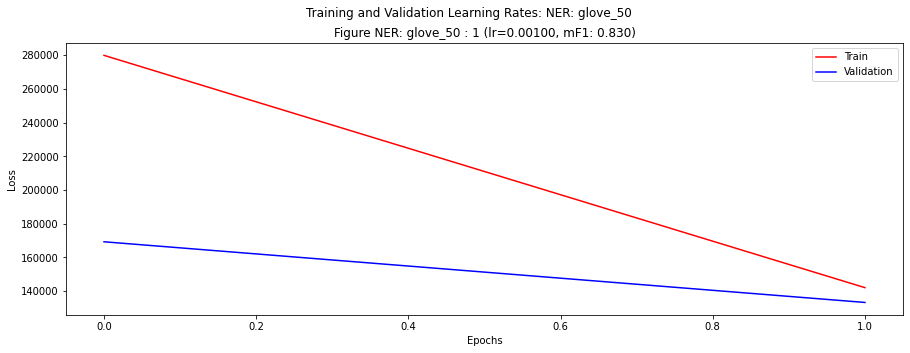

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2021-04-13 09:36:23,679 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-13 09:36:23,680 [zensols.deeplearn.model.facade] training...
2021-04-13 09:36:23,681 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-04-13 09:36:23,682 [zensols.deeplearn.model.executor.status] train/test sets: 110 26
2021-04-13 09:36:23,712 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-13 09:36:23,741 [zensols.deeplearn.model.executor.status] training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:0 for 20 epochs using learning rate 0.01
  0%|                                                                                            | 0/20 [00:00<?, ?it/s]2021-04-13 09:36:23,743 [zensols.deeplearn.model.executor.status] watching update file ../target/update.json
tr:13259.845|va min:23113.124|va:23441.460|lr:0.01 /\: 100%|████████

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.01
  train:
    started: 04/13/2021 09:36:23:744292
    ended: 04/13/2021 09:41:15:817560
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 20/20
    ave/min loss: 13259.84506/5176.08842
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 15/20
    ave/min loss: 23113.12424/2413.92551
    accuracy: 0.964 (49512/51348)
    micro: F1: 0.964, precision: 0.964, recall: 0.964
    macro: F1: 0.813, precision: 0.849, recall: 0.785
    weighted: F1: 0.963, precision: 0.963, recall: 0.964
  test:
    started: 04/13/2021 09:41:16:069540
    ended: 04/13/2021 09:41:17:299402
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

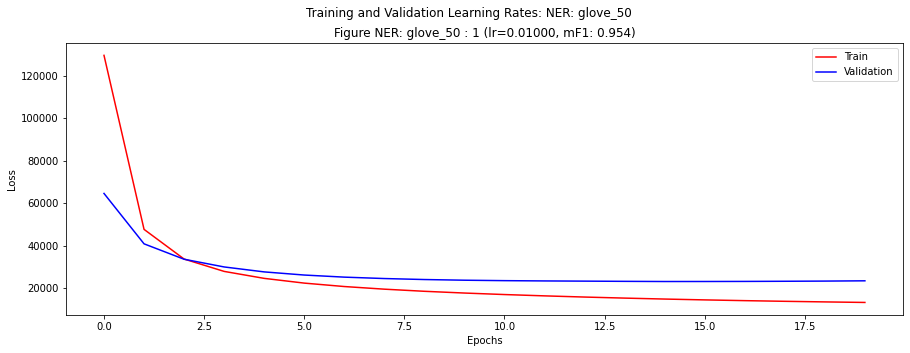

In [5]:
facade.learning_rate = 0.01
facade.epochs = 20
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-04-13 09:41:17,725 [zensols.deepnlp.embed.wordtext] reading binary vector file: ../corpus/glove/bin/6B.300/vec
2021-04-13 09:41:19,134 [zensols.deepnlp.embed.wordtext] loaded 400000 vectors in 1s
2021-04-13 09:41:19,516 [zensols.deepnlp.embed.wordtext] prepared vectors in 0s
2021-04-13 09:41:19,517 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0
2021-04-13 09:41:19,676 [zensols.deeplearn.model.facade] clearing
2021-04-13 09:41:19,701 [zensols.deeplearn.model.facade] creating new executor
2021-04-13 09:41:19,707 [zensols.deepnlp.embed.domain] reusing already cached from use cuda: True, device: cuda:0
2021-04-13 09:41:19,717 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-13 09:41:19,717 [zensols.deeplearn.model.facade] training...
2021-04-13 09:41:19,754 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-04-13 09:41:19,755 [zensols.deeplearn.mod

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.01
  train:
    started: 04/13/2021 09:41:26:924085
    ended: 04/13/2021 09:45:09:278067
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 15/15
    ave/min loss: 5256.54403/1216.76124
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 8/15
    ave/min loss: 22344.82900/2838.91182
    accuracy: 0.968 (49705/51348)
    micro: F1: 0.968, precision: 0.968, recall: 0.968
    macro: F1: 0.843, precision: 0.874, recall: 0.819
    weighted: F1: 0.967, precision: 0.967, recall: 0.968
  test:
    started: 04/13/2021 09:45:11:273879
    ended: 04/13/2021 09:45:12:573979
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.95

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

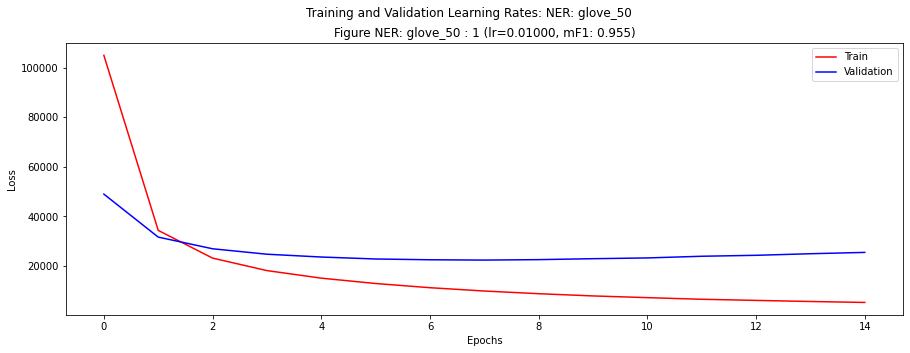

In [6]:
facade.epochs = 15
facade.embedding = 'glove_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-04-13 09:45:12,999 [zensols.deepnlp.embed.word2vec] reading binary vector file
2021-04-13 09:45:13,000 [zensols.deepnlp.embed.word2vec] loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
2021-04-13 09:45:46,184 [zensols.deepnlp.embed.word2vec] loaded key model from /home/landes/view/nlp/deepnlp/example/ner/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 33s
2021-04-13 09:45:46,185 [zensols.deepnlp.embed.word2vec] loaded word2vec model in 33s
2021-04-13 09:45:57,720 [zensols.deepnlp.embed.word2vec] created data structures in 11s
2021-04-13 09:45:58,371 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0
2021-04-13 09:45:59,574 [zensols.deeplearn.model.facade] clearing
2021-04-13 09:45:59,590 [zensols.deeplearn.model.facade] creating new executor
2021-04-13 09:45:59,596 [zensols.deepnlp.embed.domain] reusing already cached from use cuda: True, device: cuda:0
2021-04-13 09:45:59,605 [zensols.deeplearn

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.01
  train:
    started: 04/13/2021 09:46:08:869280
    ended: 04/13/2021 09:49:51:353398
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 15/15
    ave/min loss: 6131.78694/2242.44738
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 9/15
    ave/min loss: 17958.55599/2162.74740
    accuracy: 0.976 (50113/51348)
    micro: F1: 0.976, precision: 0.976, recall: 0.976
    macro: F1: 0.875, precision: 0.894, recall: 0.857
    weighted: F1: 0.976, precision: 0.975, recall: 0.976
  test:
    started: 04/13/2021 09:49:56:333757
    ended: 04/13/2021 09:49:57:629502
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.96

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

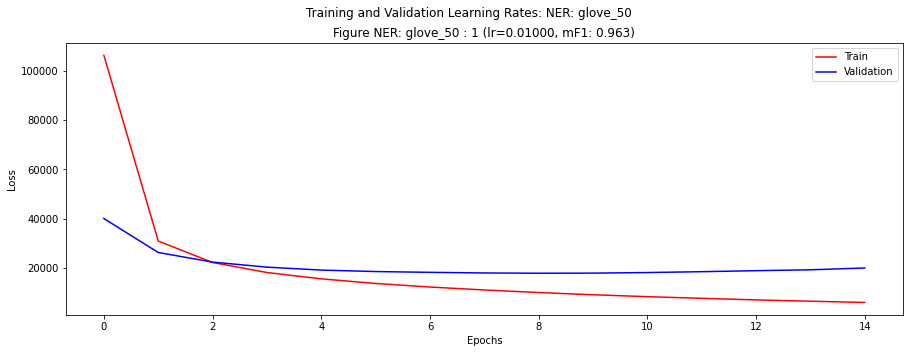

In [7]:
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-04-13 10:37:24,840 [zensols.deeplearn.model.facade] clearing
2021-04-13 10:37:24,845 [zensols.deeplearn.model.facade] creating new executor
2021-04-13 10:37:24,912 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-13 10:37:24,912 [zensols.deeplearn.model.facade] training...
2021-04-13 10:37:24,936 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-04-13 10:37:24,936 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-04-13 10:37:36,736 [zensols.deeplearn.model.executor.status] loaded 136 batches in 11s
2021-04-13 10:37:36,737 [zensols.deeplearn.model.executor.status] train/test sets: 110 26
2021-04-13 10:37:36,741 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-13 10:37:36,744 [zensols.deeplearn.model.executor.status] training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on 

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.01
  train:
    started: 04/13/2021 10:37:36:785462
    ended: 04/13/2021 11:03:56:531381
    batches: 110
    ave data points per batch/total: 127.6/14041
    converged/epochs: 50/50
    ave/min loss: 33163.93925/9834.09916
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch/total: 125.0/3250
    converged/epochs: 8/50
    ave/min loss: 70526.79016/10309.08746
    accuracy: 0.872 (44779/51348)
    micro: F1: 0.872, precision: 0.872, recall: 0.872
    macro: F1: 0.526, precision: 0.578, recall: 0.495
    weighted: F1: 0.866, precision: 0.863, recall: 0.872
  test:
    started: 04/13/2021 11:03:59:146466
    ended: 04/13/2021 11:04:03:343594
    batches: 27
    ave data points per batch/total: 127.9/3453
    converged/epochs: 1/1
    ave/min loss

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

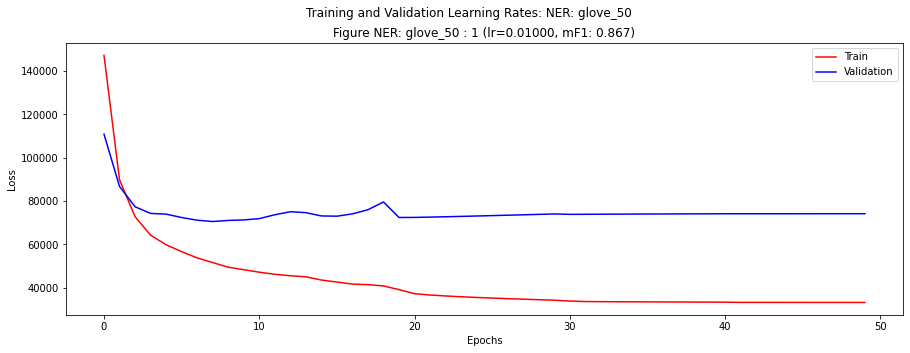

In [4]:
facade.learning_rate = 0.01
facade.epochs = 30
facade.embedding = 'transformer_embedding'
facade.net_settings.add_attributes = ()
facade.train()
facade.test()
facade.write_result()
facade.plot_result()